In [2]:
import pandas as pd
import networkx as nx
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import defaultdict
import ndex2
import sys
from importlib import reload
sys.path.append('/cellar/users/snwright/Git/rare_common/carva')
import geneset_utils
reload(geneset_utils)

<module 'geneset_utils' from '/cellar/users/snwright/Git/rare_common/carva/geneset_utils.py'>

In [3]:
ndex_server='public.ndexbio.org'

ndex_user=None
ndex_password=None
G_overlap_cx = ndex2.create_nice_cx_from_server(
        ndex_server, 
        username=ndex_user, 
        password=ndex_password, 
        uuid='5f5da339-f14a-11ee-9621-005056ae23aa')
G_overlap = G_overlap_cx.to_networkx()
print('number of nodes:')
print(len(G_overlap.nodes))
print('\nnumber of edges:')
print(len(G_overlap.edges))

number of nodes:
18960

number of edges:
6583400


In [27]:
with open('tf_list.txt', 'r') as f:
    all_tfs = [x.strip() for x in f.readlines()]

In [28]:
all_tfs

['ZNF354C',
 'KLF12',
 'ZNF143',
 'ZIC2',
 'ZNF274',
 'SP2',
 'ZBTB7A',
 'BCL6B',
 'ZBTB49',
 'ZIC1',
 'ZNF232',
 'ZNF282',
 'ZNF410',
 'ZSCAN16',
 'ZNF524',
 'ZNF713',
 'ZNF75A',
 'ZSCAN4',
 'ZNF200',
 'SNAI2',
 'KLF1',
 'BCL6',
 'EGR2',
 'OVOL2',
 'GFI1',
 'GFI1B',
 'KLF11',
 'WT1',
 'ZNF655',
 'FOXC1',
 'ARX',
 'VSX1',
 'CRX',
 'PBX4',
 'PHOX2B',
 'VAX2',
 'VSX2',
 'MSX2',
 'ESX1',
 'HOXD13',
 'NKX2-8',
 'VENTX',
 'HESX1',
 'PITX2',
 'PROP1',
 'ISX',
 'NKX2-5',
 'SIX6',
 'HOXC4',
 'HOXB7',
 'PAX6',
 'PAX7',
 'PAX4',
 'PAX3',
 'POU4F3',
 'POU6F2',
 'POU3F4',
 'NR1H4',
 'NR2E3',
 'POU2F1',
 'RBPJ',
 'FOXP1',
 'MAX',
 'PHF1',
 'MTF2',
 'BCL11A',
 'BCL11B',
 'FOXN2',
 'FOXR1',
 'SOX4',
 'SOHLH2',
 'ZSCAN29',
 'PLAGL2',
 'VEZF1',
 'ZBTB44',
 'CENPBD1',
 'TIGD1',
 'CXXC5',
 'FOXN3',
 'HDX',
 'DUXA',
 'MSANTD3',
 'ZZZ3',
 'LCORL',
 'NFATC4',
 'CUX2',
 'CUX1',
 'DLX3',
 'LHX9',
 'POU5F1B',
 'NFATC2',
 'ZFHX3',
 'KDM2B',
 'KMT2A',
 'DNMT1',
 'TET1',
 'DMRT3',
 'DMRT1',
 'DMRTA2',
 'DMRT2',
 

In [9]:
tf_list = ['ETS1', 'FLT1', 'ETS2', 'BRAF', 'STAT3', 'SMAD3','ZFP36', 'TP53', 'FOXP3', 'CEBPB','SNAI1', 'NFKB1','EGR1', 'FOS' , 'E2F1', 'SPI1']

In [12]:
all_degrees = {g:G_overlap.degree[g] for g in G_overlap.nodes}

In [30]:
all_tf_degrees = {g:v for g, v in all_degrees.items() if g in all_tfs}

In [24]:
all_degrees['FOXP3']

1993

In [25]:
all_degrees['NFKB1']

4680

In [16]:
mean_degree = np.mean(list(all_degrees.values()))

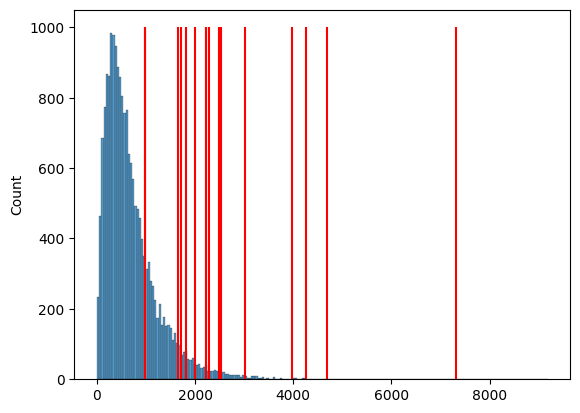

In [19]:
sns.histplot(list(all_degrees.values()))
for tf in tf_list:
    plt.vlines(x=all_degrees[tf], ymin=0, ymax=1000, color='red')

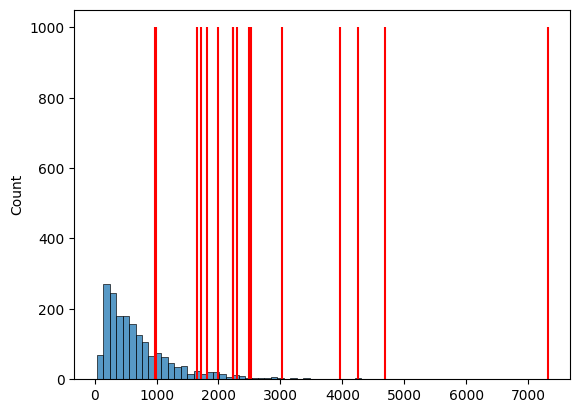

In [31]:
sns.histplot(list(all_tf_degrees.values()))
for tf in tf_list:
    plt.vlines(x=all_degrees[tf], ymin=0, ymax=1000, color='red')

In [11]:
tf_degrees

{'ETS1': 1715,
 'FLT1': 1660,
 'ETS2': 981,
 'BRAF': 3020,
 'STAT3': 4257,
 'SMAD3': 2486,
 'ZFP36': 986,
 'TP53': 7317,
 'FOXP3': 1993,
 'CEBPB': 2291,
 'SNAI1': 2229,
 'NFKB1': 4680,
 'EGR1': 2521,
 'FOS': 3966,
 'E2F1': 2228,
 'SPI1': 1809}

In [ ]:
# can I identify the average degree of TFs?